---
#Business understanding and Hypothesis Framing

### **Context**: 
    
PowerCo supplies electricity and gas to SME (Small and Medium Enterprise) and residential customers. There is a significant customer churn, especially in SME segment. 

PowerCo need to diagnose the source of churning SME customers, to know which customers are more(or less) likely to churn at their current price. 
* For those customers that are at risk of churning, a 20% discount might incentivize them to stay.
* PowerCo plans to use the predictive model on the 1st working day of every month to indicate to wich customers the 20% discount should be offered.

###**Hypothesis**: 
    the churn is driven by the customers' price sensitivities.


####**Data:**
* Historical customer data: Customer data such as usage, sign up date, forecasted usage, etc.
* Historical pricing data: variable and fixed pricing data.
* Churn indicator whether each customer has churned or not.


---

# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Hypothesis investigation



---

## 1. Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Access to Google drive folder

Allow access to our drive

In [2]:
# Drive in notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # Mount the folder we want to access

Mounted at /content/drive


---

## 2. Loading data with Pandas

Data stored in csv files:
* **client_data.csv**
* **price_data.csv**


### Dataset **client_data.csv**

Dataset contains 14606 rows and 26 columns.

Columns:

    ● id = client company identifier
    ● activity_new = category of the company’s activity
    ● channel_sales = code of the sales channel
    ● cons_12m = electricity consumption of the past 12 months
    ● cons_gas_12m = gas consumption of the past 12 months
    ● cons_last_month = electricity consumption of the last month
    ● date_activ = date of activation of the contract
    ● date_end = registered date of the end of the contract
    ● date_modif_prod = date of the last modification of the product
    ● date_renewal = date of the next contract renewal
    ● forecast_cons_12m = forecasted electricity consumption for next 12 months
    ● forecast_cons_year = forecasted electricity consumption for the next calendar year
    ● forecast_discount_energy = forecasted value of current discount
    ● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
    ● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
    ● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
    ● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
    ● has_gas = indicated if client is also a gas client
    ● imp_cons = current paid consumption
    ● margin_gross_pow_ele = gross margin on power subscription
    ● margin_net_pow_ele = net margin on power subscription 
    ● nb_prod_act = number of active products and services
    ● net_margin = total net margin
    ● num_years_antig = antiquity of the client (in number of years)
    ● origin_up = code of the electricity campaign the customer first subscribed to
    ● pow_max = subscribed power
    ● churn = has the client churned over the next 3 months


### Dataset **price_data.csv**

Dataset contains 193002 rows and 8 columns.

Columns:

    ● id = client company identifier
    ● price_date = reference date
    ● price_off_peak_var = price of energy for the 1st period (off peak)
    ● price_peak_var = price of energy for the 2nd period (peak)
    ● price_mid_peak_var = price of energy for the 3rd period (mid peak)
    ● price_off_peak_fix = price of power for the 1st period (off peak)
    ● price_peak_fix = price of power for the 2nd period (peak)
    ● price_mid_peak_fix = price of power for the 3rd period (mid peak)

Load the data (`client_data.csv` and `price_data.csv`)into individual Pandas dataframes using the *pandas.read_csv* function.

In [3]:
# Create dataframe of client data 
client_df = pd.read_csv("/content/drive/MyDrive/Portafolio/BCG /data/client_data.csv")
# Create dataframe of client data 
price_df = pd.read_csv("/content/drive/MyDrive/Portafolio/BCG /data/price_data.csv")

Let's look at the first 3 rows of both dataframes to see what the data looks like

In [ ]:
client_df.head(3) # visualize first 3 rows

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


**NOTE**: With the client data, we have a mix of numeric and categorical data, which we will need to transform before modelling later

In [ ]:
price_df.head(3) # visualize first 3 rows

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


**NOTE**: With the price data, it is purely numeric data but we can see a lot of zeros

---

## 3. Descriptive statistics of data

### Data types

Understand the data that we're dealing with along with the data types of each column.

* The data types may dictate how you transform and engineer features.

In [ ]:
# use info() function to get concise summary of the client dataframe
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
# use info() function to get concise summary of the price dataframe
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


**NOTE:** 
* We can see that all of the `datetime` related columns are not currently in datetime format. We will need to convert these later.
* As we can see, apparently there are no null values into both datasets.

### Statistics

Now let's look at some statistics about the datasets

In [ ]:
# The describe method gives us a lot of information about the client data
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


We use histograms to observe the distribution of the numerical variables.

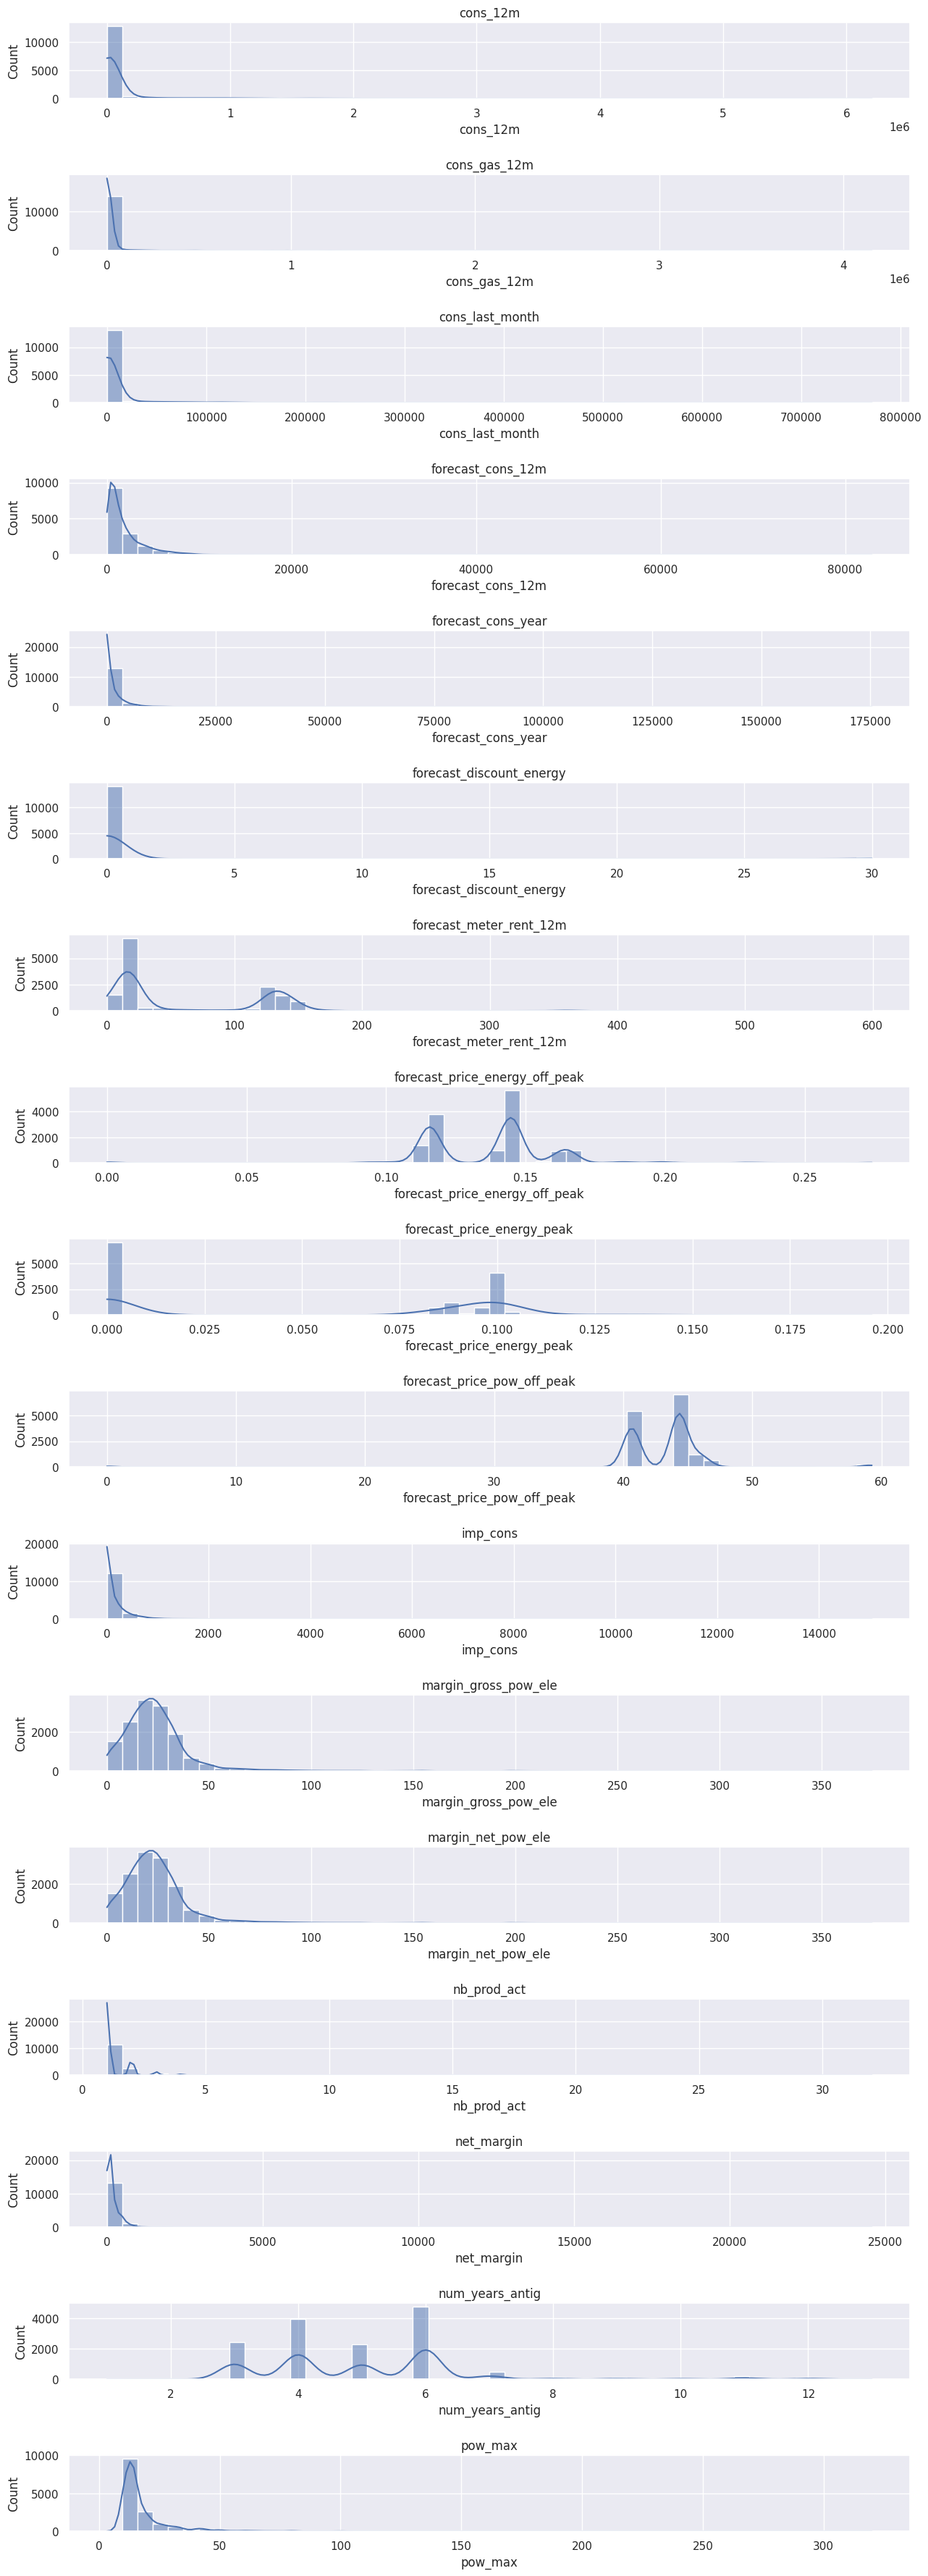

In [71]:
col_num_client = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']

# create figure
fig, ax = plt.subplots(nrows = len(col_num_client), ncols=1, figsize=(15,45))
fig.subplots_adjust(hspace = 1)

for i, col in enumerate(col_num_client):
    sns.histplot(x=col, data = client_df, ax=ax[i], bins = 50, kde = True)
    ax[i].set_title(col)

**NOTE:** The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.

In [ ]:
# The describe method gives us a lot of information about the price data
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


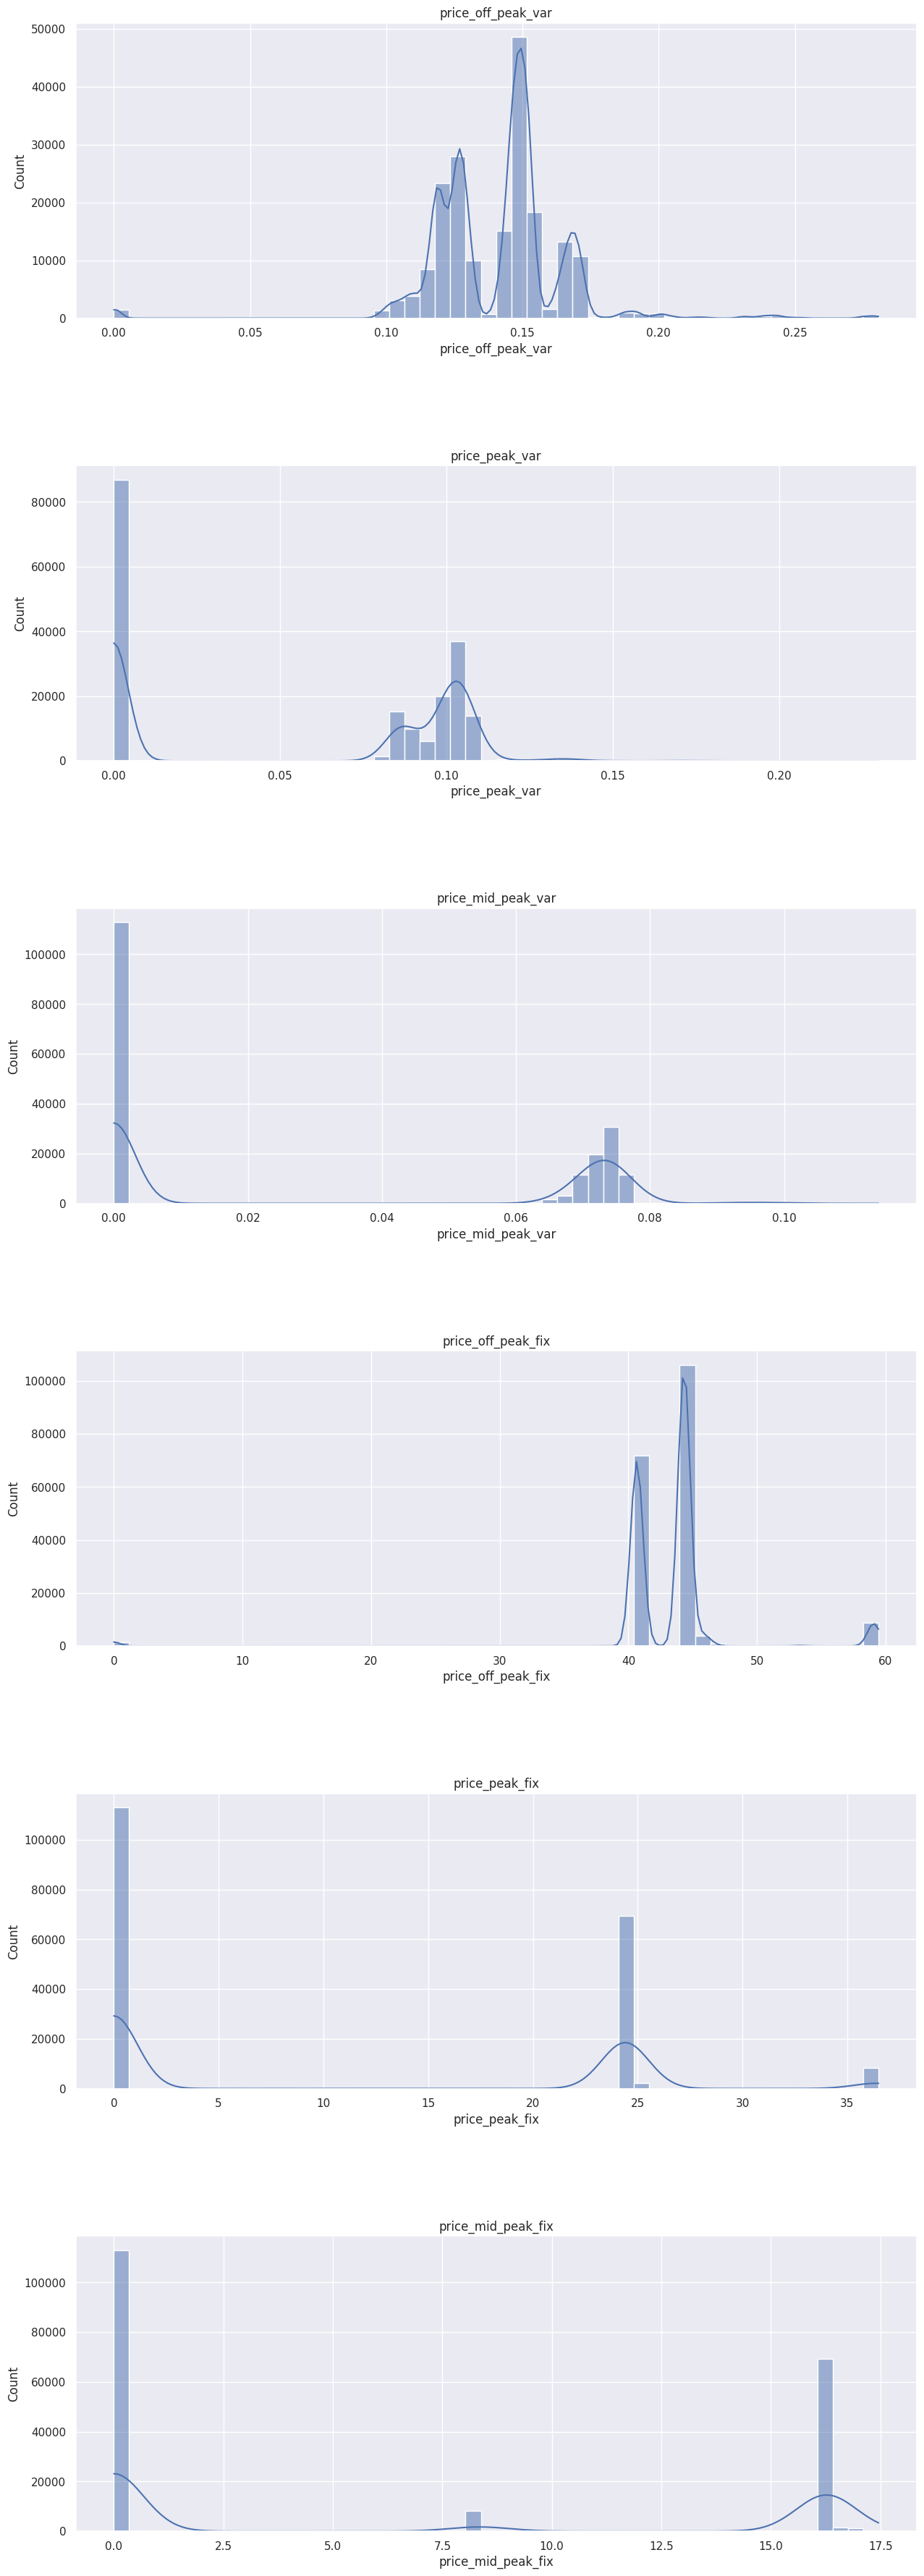

In [74]:
col_num_price = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

# create figure
fig, ax = plt.subplots(nrows = len(col_num_price), ncols=1, figsize=(15,45))
fig.subplots_adjust(hspace = .5)

for i, col in enumerate(col_num_price):
    sns.histplot(x=col, data = price_df, ax=ax[i], bins = 50, kde = True)
    ax[i].set_title(col)

**NOTE:** Overall the price data looks good.

---

## 3. Data visualization

Now let's dive a bit deeper into the dataframes

In [ ]:
# Function used to plot a stacked bar chart. 
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    # create a figure
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### Churn (Response Variable)

The following stacked bar chart shows the percentage of observation that correspond to each class of the response variable: retention (0) and churn (1).

In [ ]:
# Create a stacked bar chart showing the percentage of churn
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

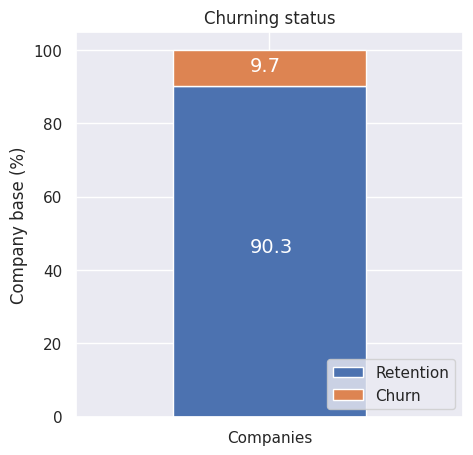

In [ ]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

**NOTE:**

- As show above, client dataset is an **imbalanced data set** because both classes are not equally distributed among all records.
    
    * Retention: majority class (90.3%)
    * Churn: 9.7%

- During the modeling this imbalance will lead to a large number of false negatives. 

### Sales channel

In [ ]:
# Create a dataframe with the sales channel data column
channel = client_df[['id', 'channel_sales', 'churn']]
# Create a stacked bar chart that show the percentage churn for each sales channel
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

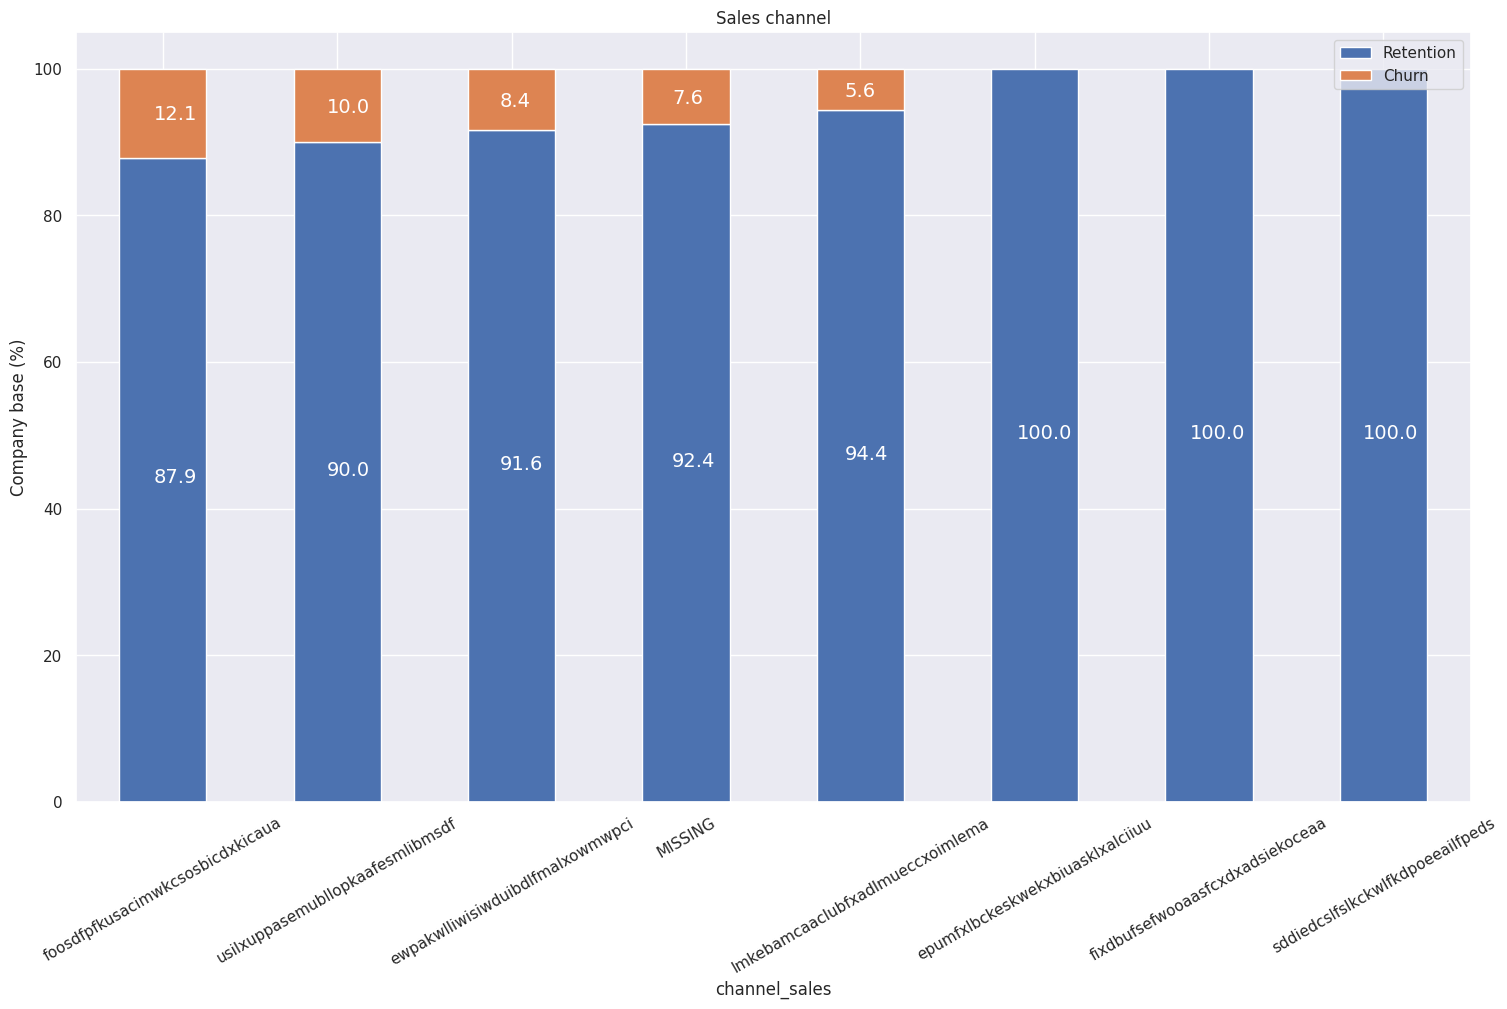

In [ ]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

**NOTE:**
 
* Interestingly, the churning customers are distributed over 5 different values for channel_sales: `foosdfpfkusacimwkcsosbicdxkicaua`, `usilxuppasemubllopkaafesmlibmsdf`, `ewpakwlliwisiwduibdlfmalxowmwpci`, `MISSING`and `lmkebamcaaclubfxadlmueccxoimlema`. 
* As well as this, the value of `MISSING` has a churn rate of 7.6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Consumption

Let's see the distribution of the consumption **in the last year and month**. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [ ]:
# create a dataframe with the consumption data columns
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [ ]:
# helps you to plot the distribution of a numeric column
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

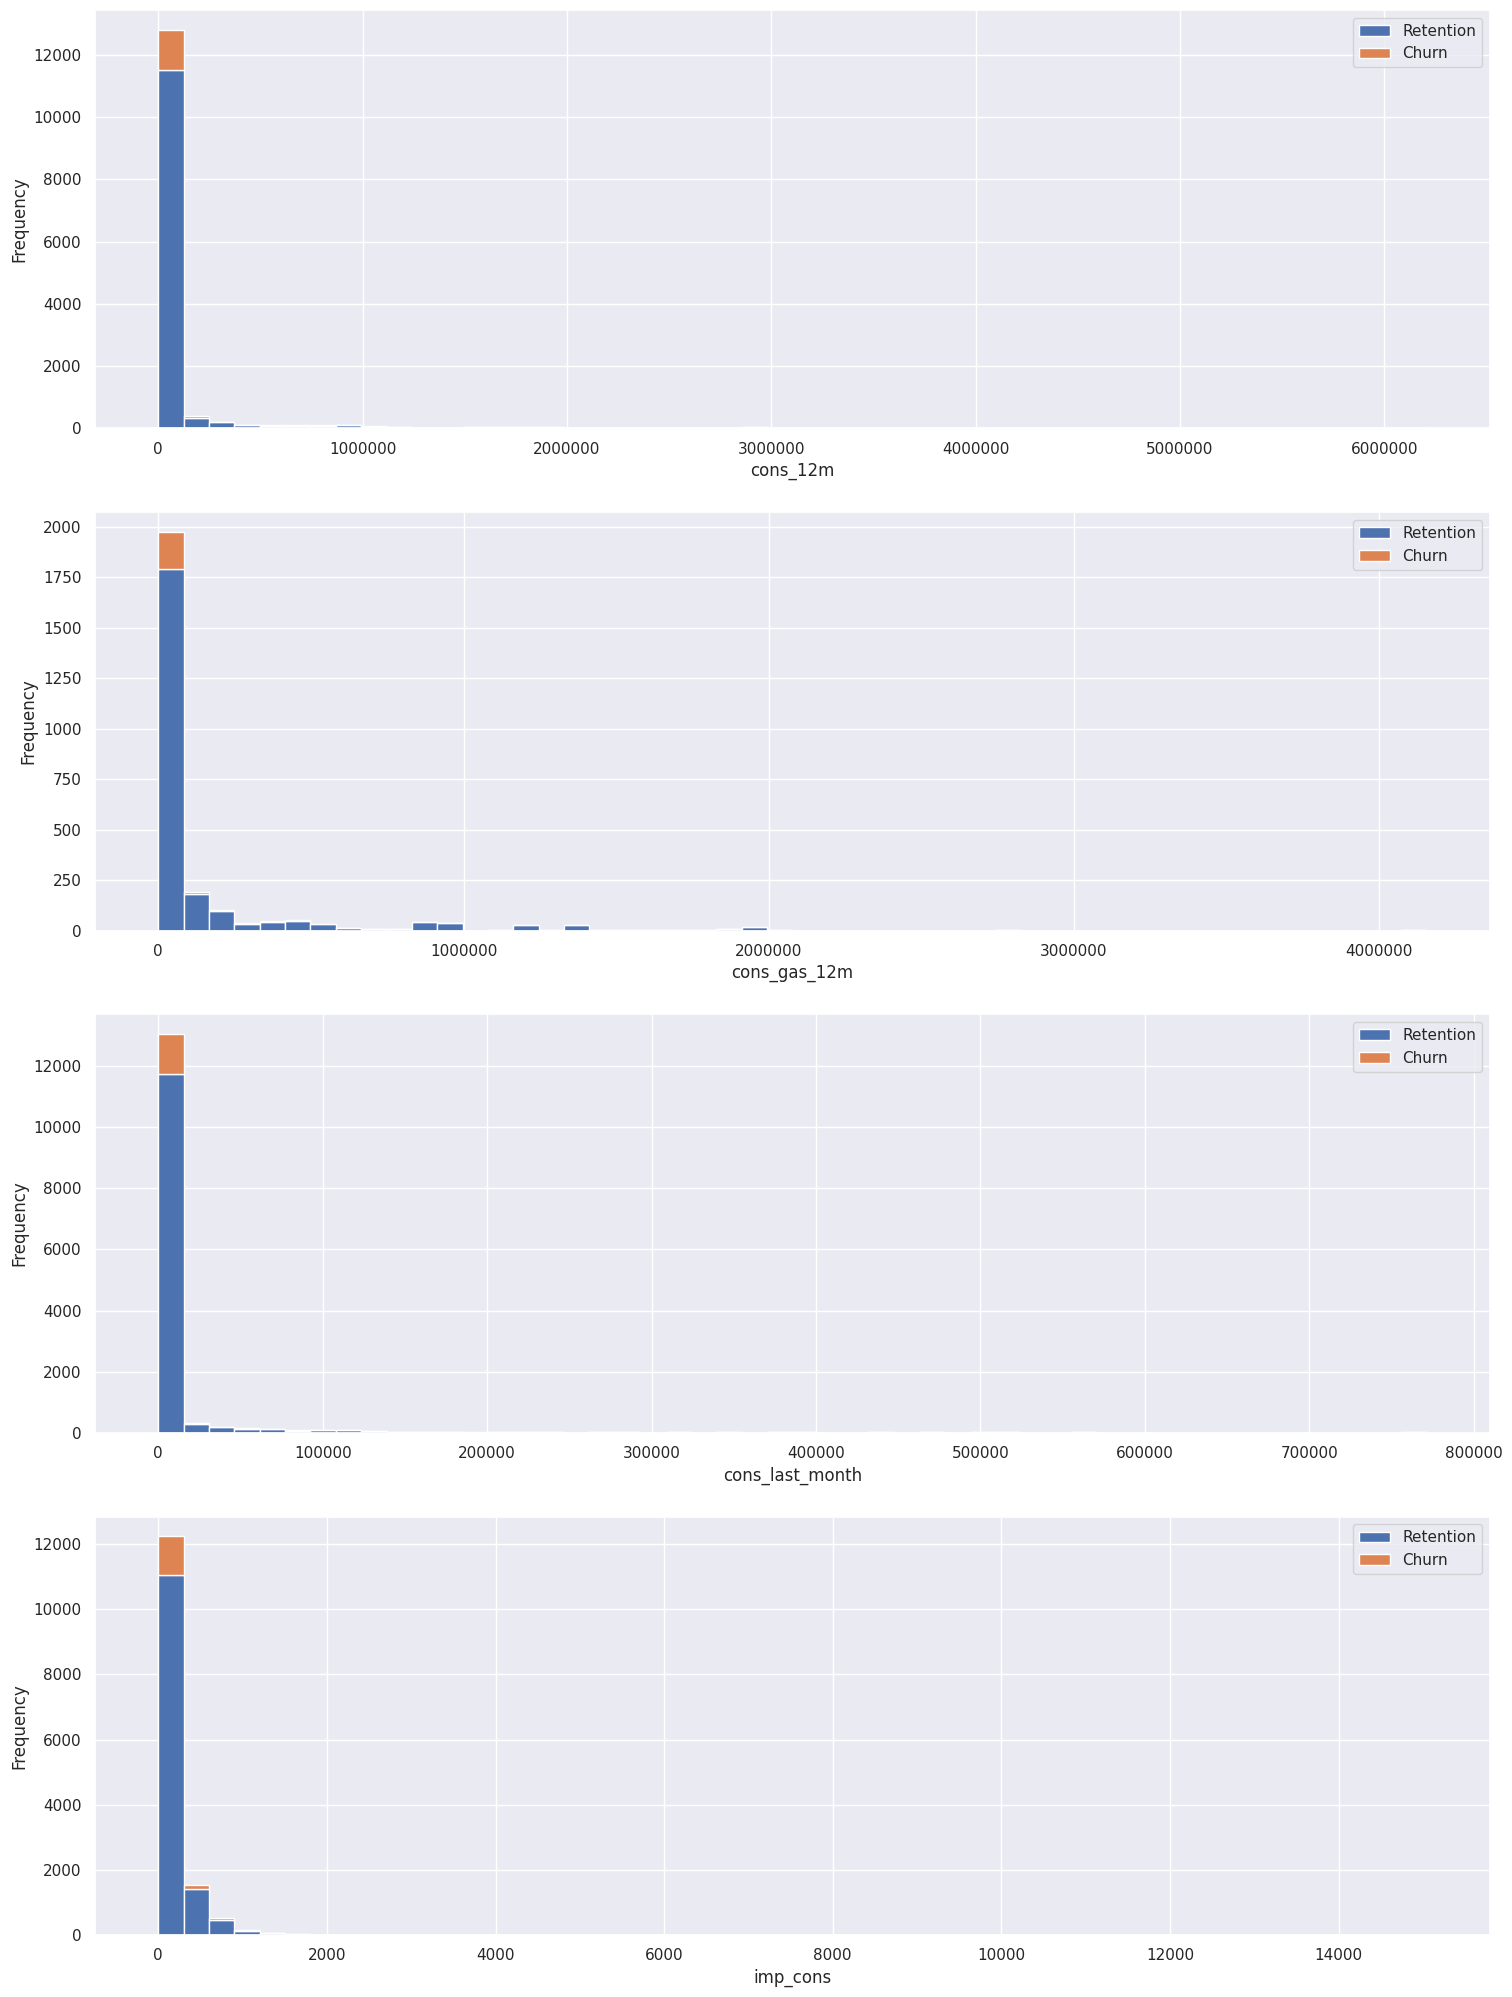

In [ ]:
# Create a stacked histogram showing the percentage of churn
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

**NOTE:**
* Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. 
* The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
    - Minimum
    - First quartile (Q1)
    - Median (or Q2)
    - Third quartile (Q3)
    - Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

Text(0.5, 1.0, 'imp_cons')

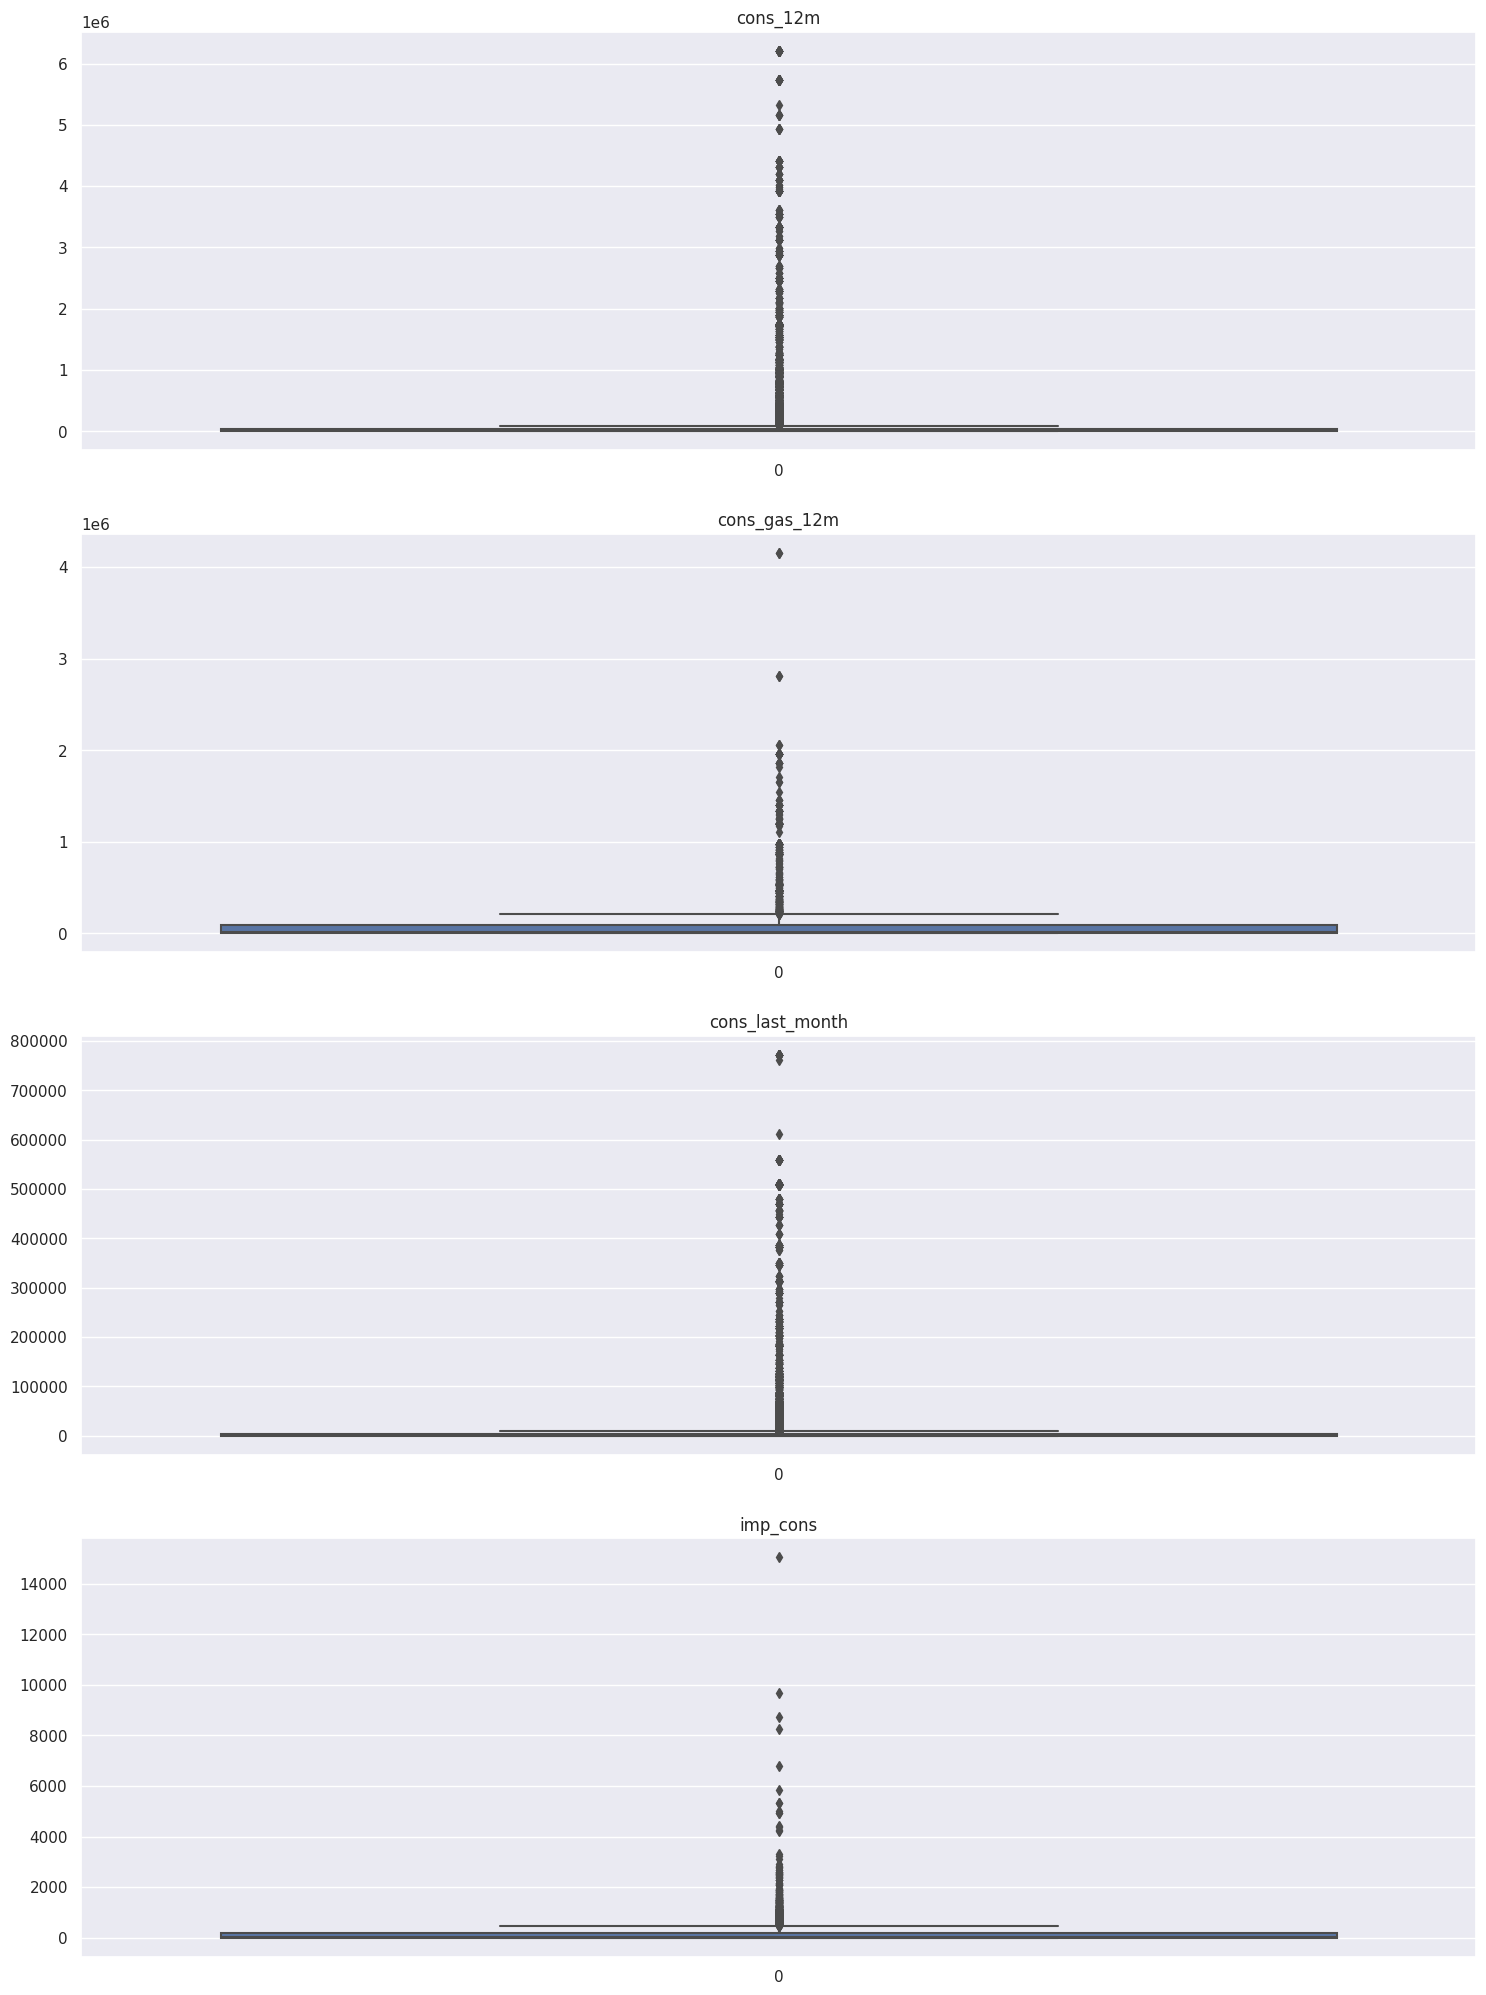

In [ ]:
# create figure
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot boxplot
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

#set title
axs[0].set_title("cons_12m")
axs[1].set_title("cons_gas_12m")
axs[2].set_title("cons_last_month")
axs[3].set_title("imp_cons")

**NOTE:** We will deal with skewness and outliers during feature engineering in the next exercise.



### Forecast

In [ ]:
# Create a dataframe with the forecast data columns
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

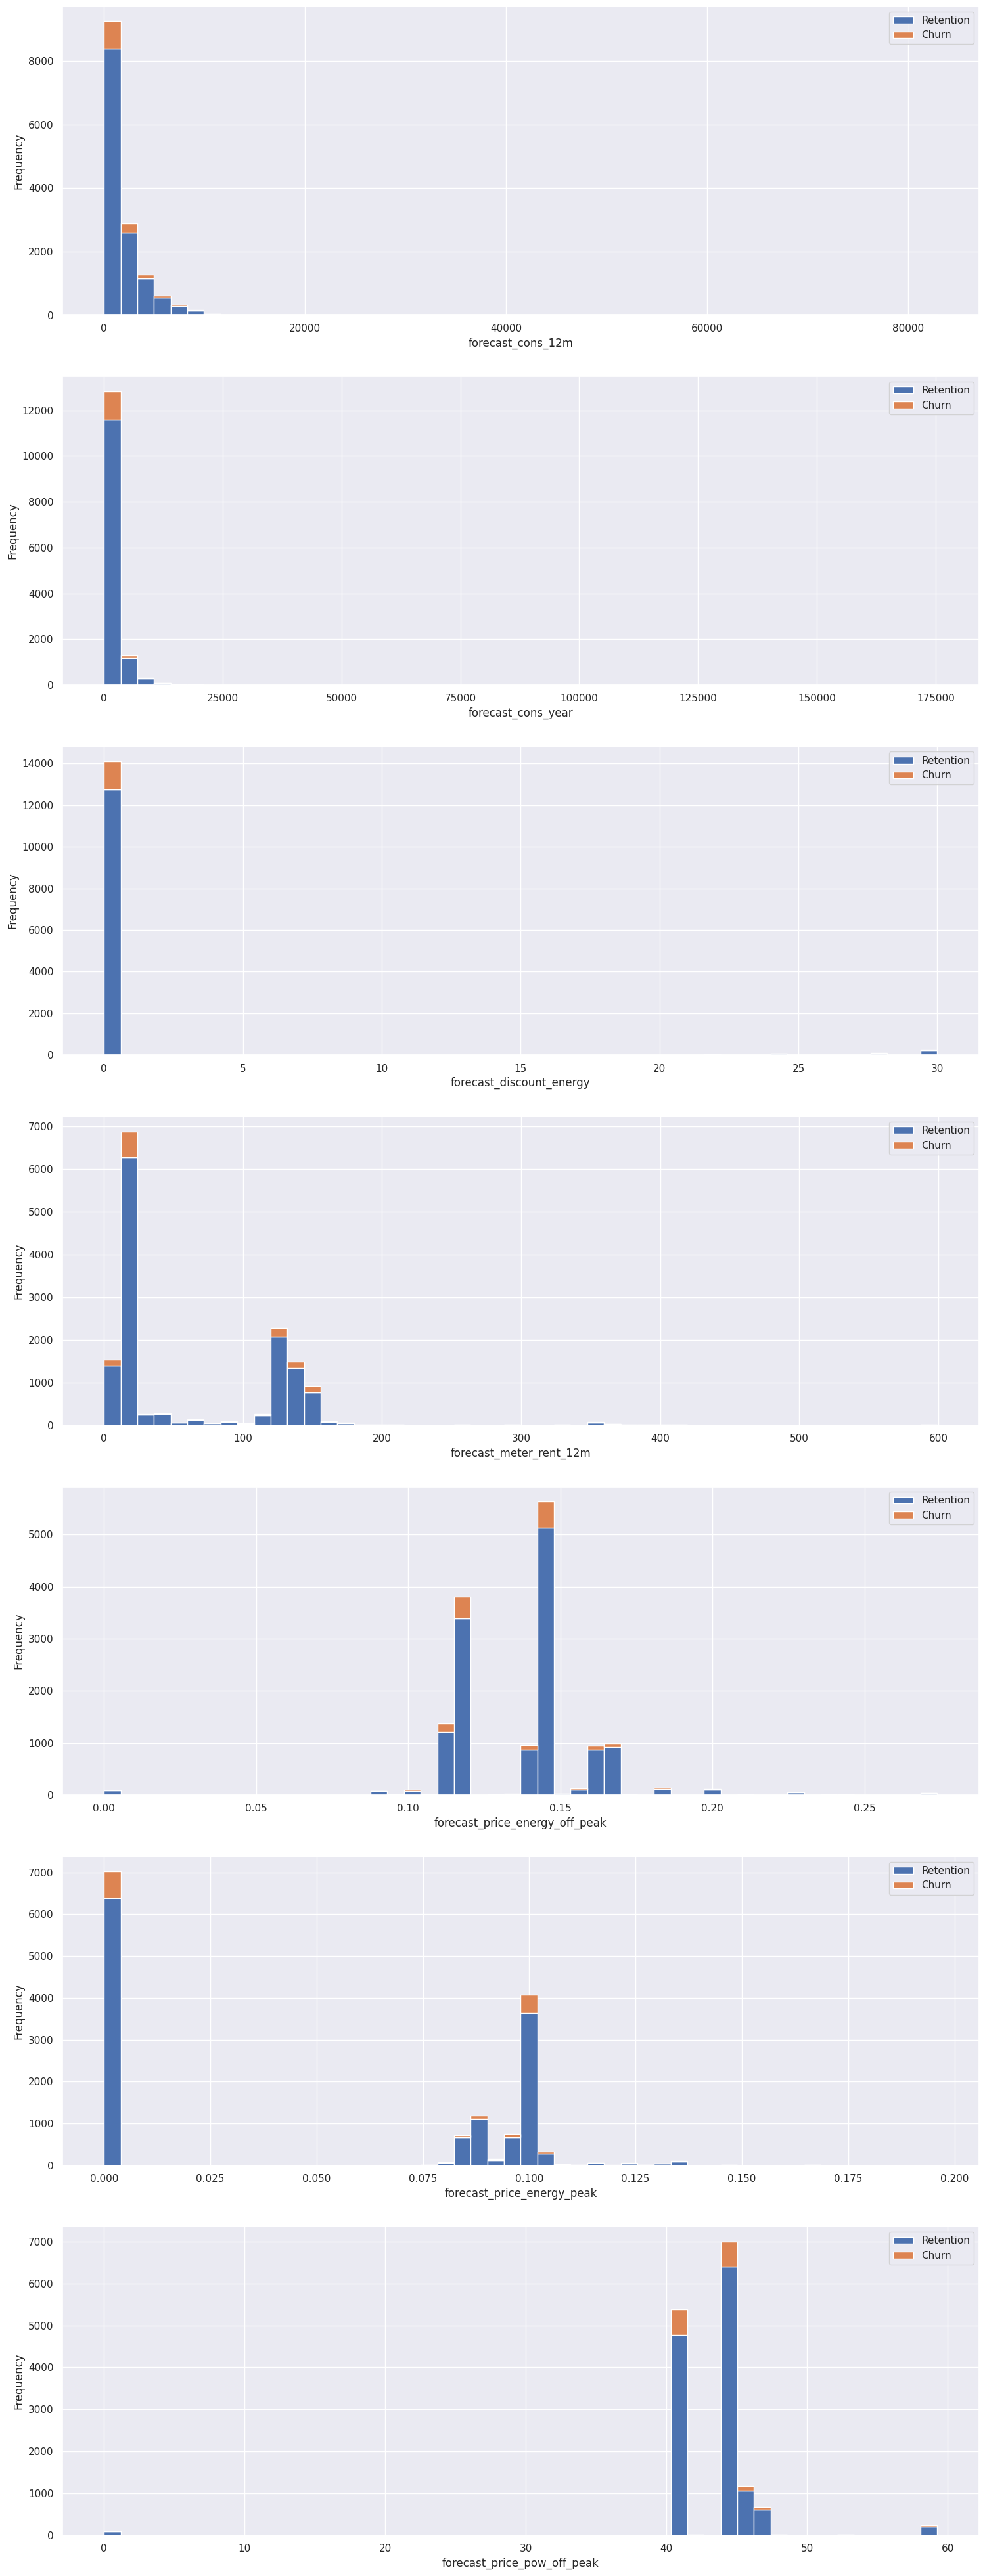

In [ ]:
# Create figure
fig, axs = plt.subplots(nrows= forecast.shape[1]-2, figsize=(18,50))

# Loop to each forecast column to create a histogram plot
for col in enumerate(forecast.columns[1:-1]):
    #print(col)
    plot_distribution(client_df, col[1], axs[col[0]])

**NOTE:** Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.



### Contract type

In [ ]:
# Create a stacked bar chart that show the percentage churn for Contract type (with gas)
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

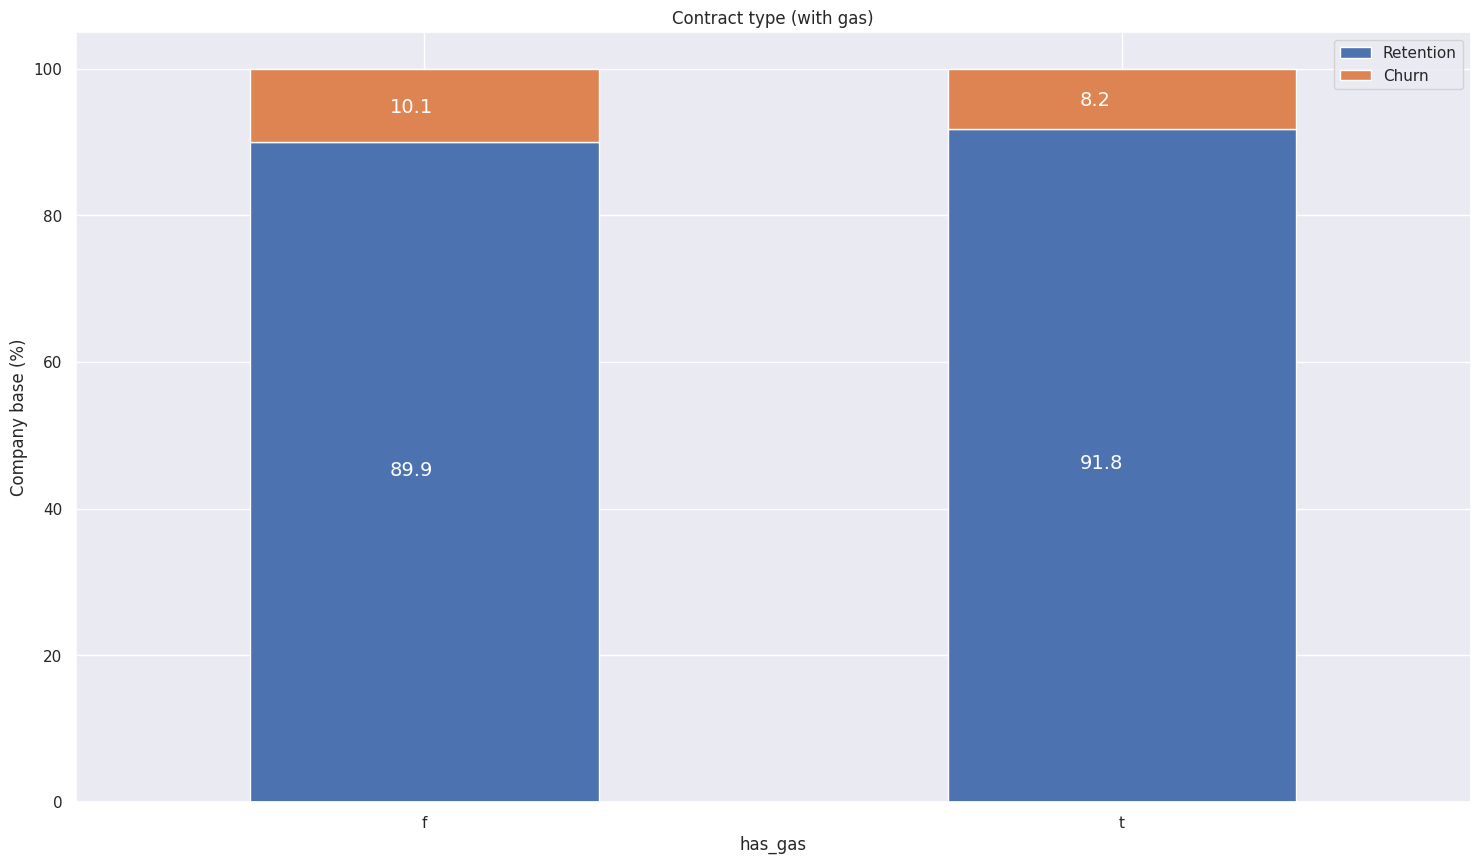

In [ ]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas)')

### Margins

In [ ]:
# Create a dataframe with margin data columns
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

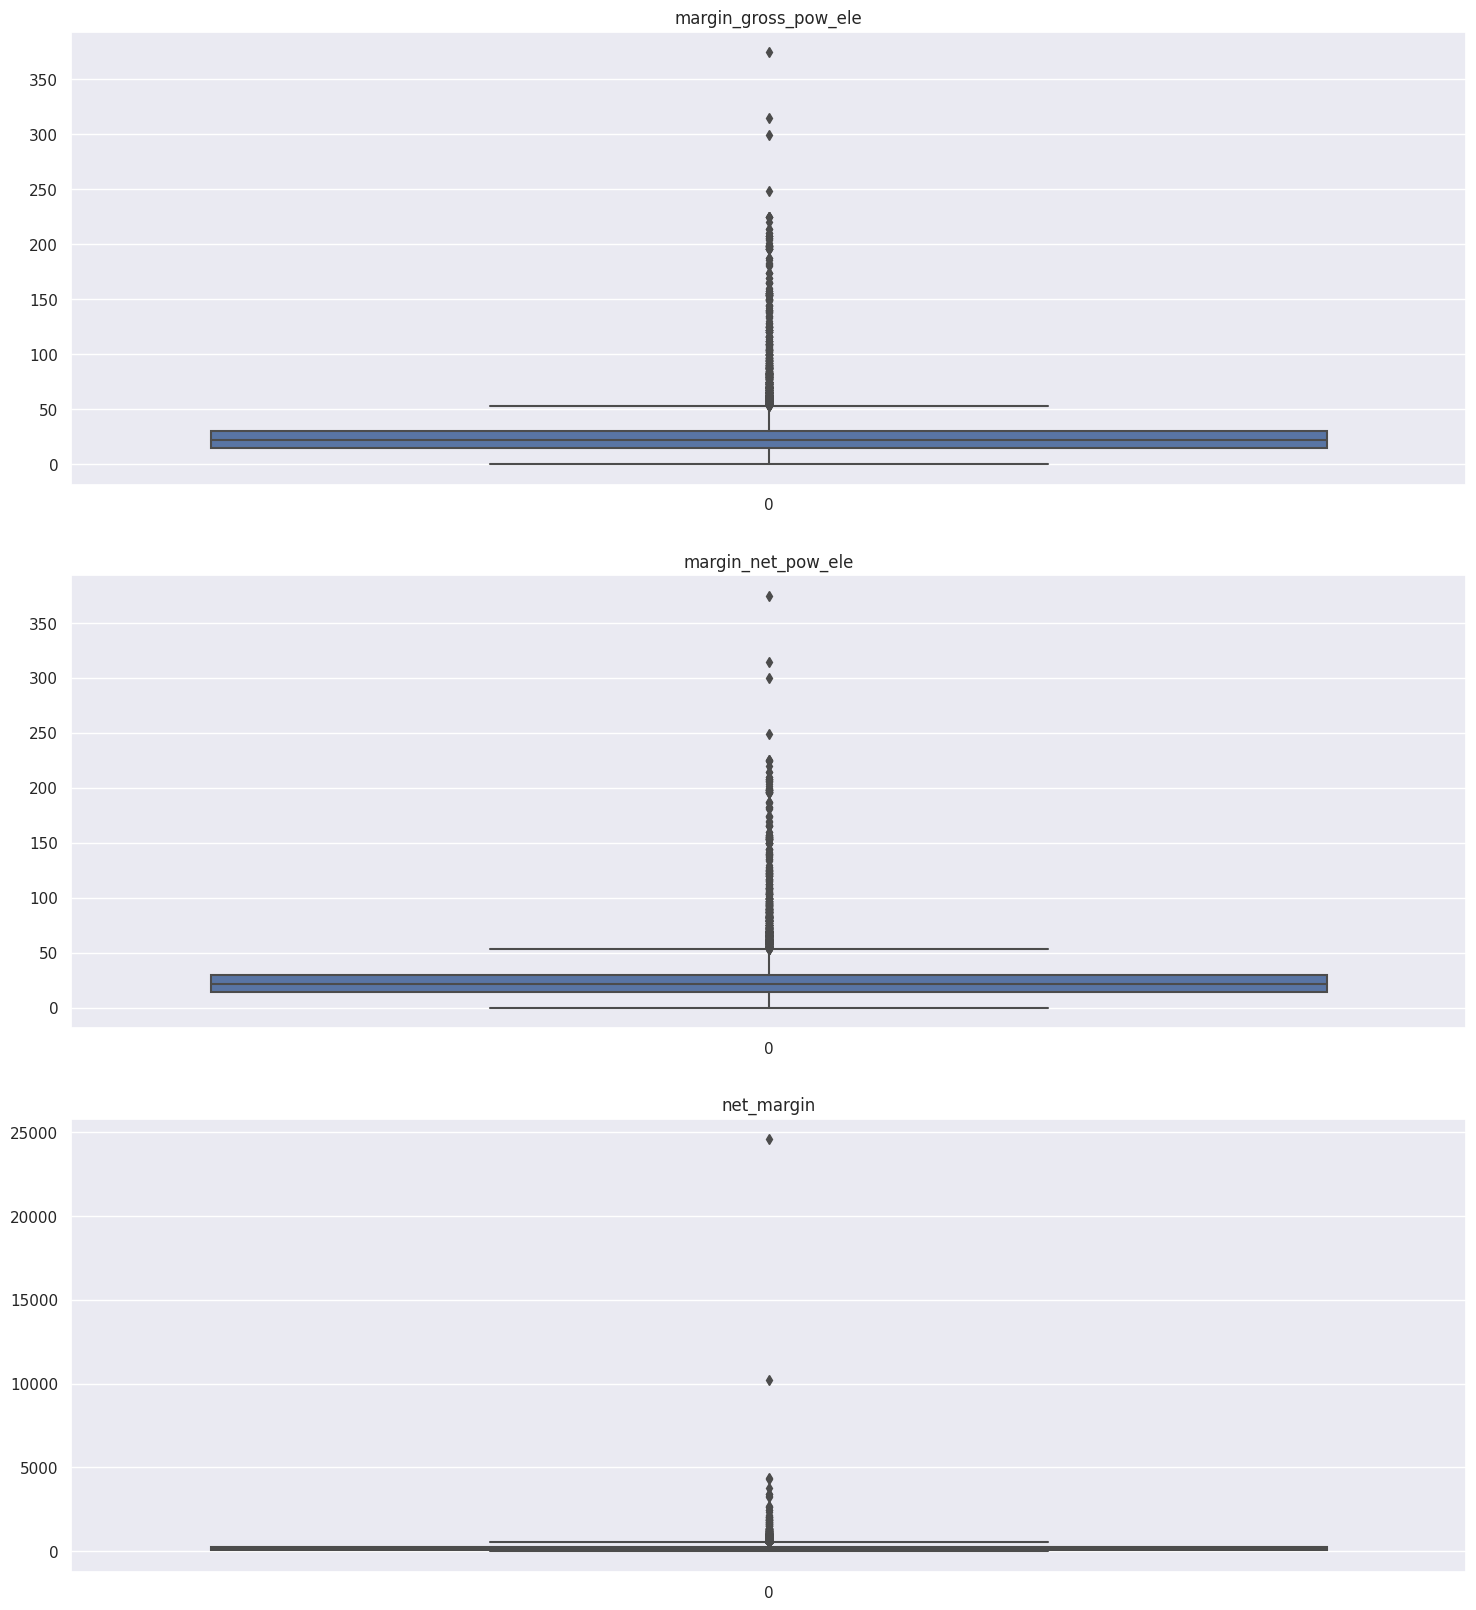

In [ ]:
# Create figure
fig, axs = plt.subplots(nrows= margin.shape[1]-1, figsize=(18,20))

# Loop to each forecast column to create a histogram plot
for col in enumerate(margin.columns[1:]):
    #print(col)
    sns.boxplot(margin[col[1]], ax=axs[col[0]])
    #set title
    axs[col[0]].set_title(col[1])

**NOTE:** We can see some outliers here as well which we will deal after.


### Subscribed power

In [ ]:
# Create dataframe with the power data column
power = client_df[['id', 'pow_max', 'churn']]

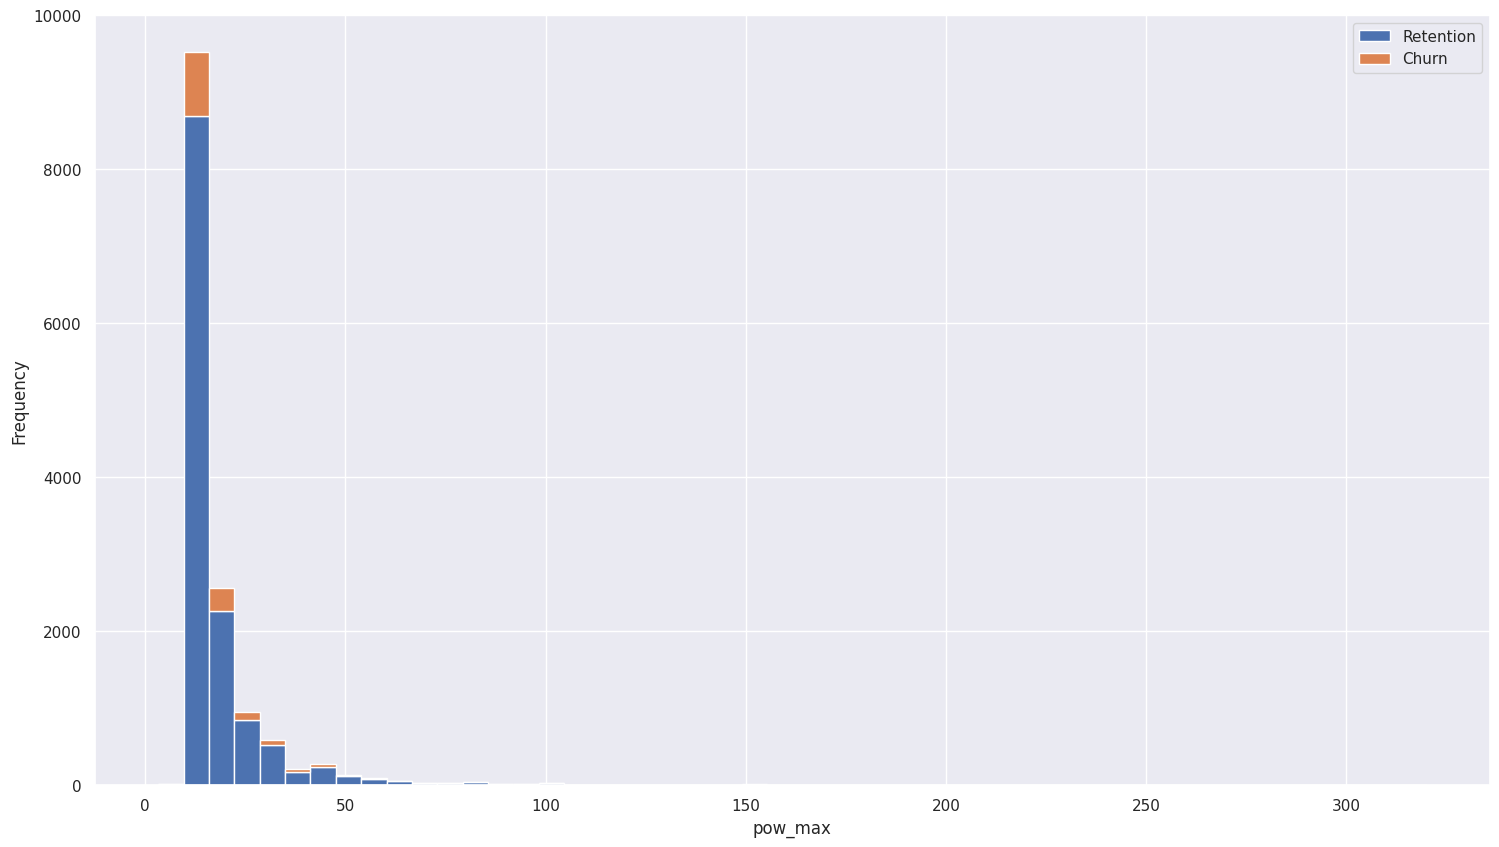

In [ ]:
# Create figure
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
# plot histogram
plot_distribution(power, 'pow_max', axs)

### Other columns

In [ ]:
# Create a dataframe with the rest of the columns
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

# Create a stacked bar chart that show the percentage churn for number of products
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

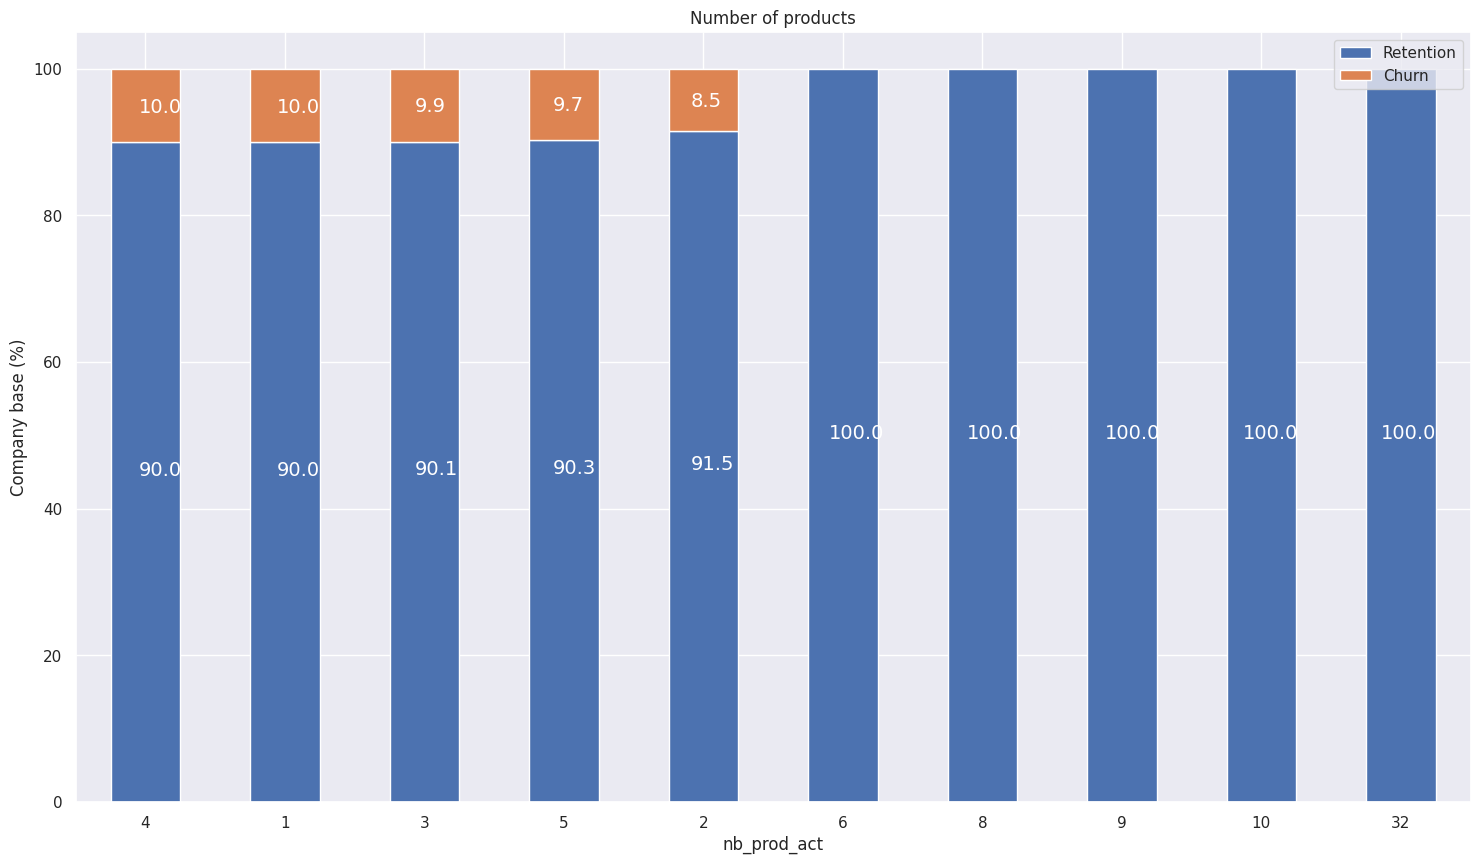

In [ ]:
plot_stacked_bars(products_percentage, "Number of products")

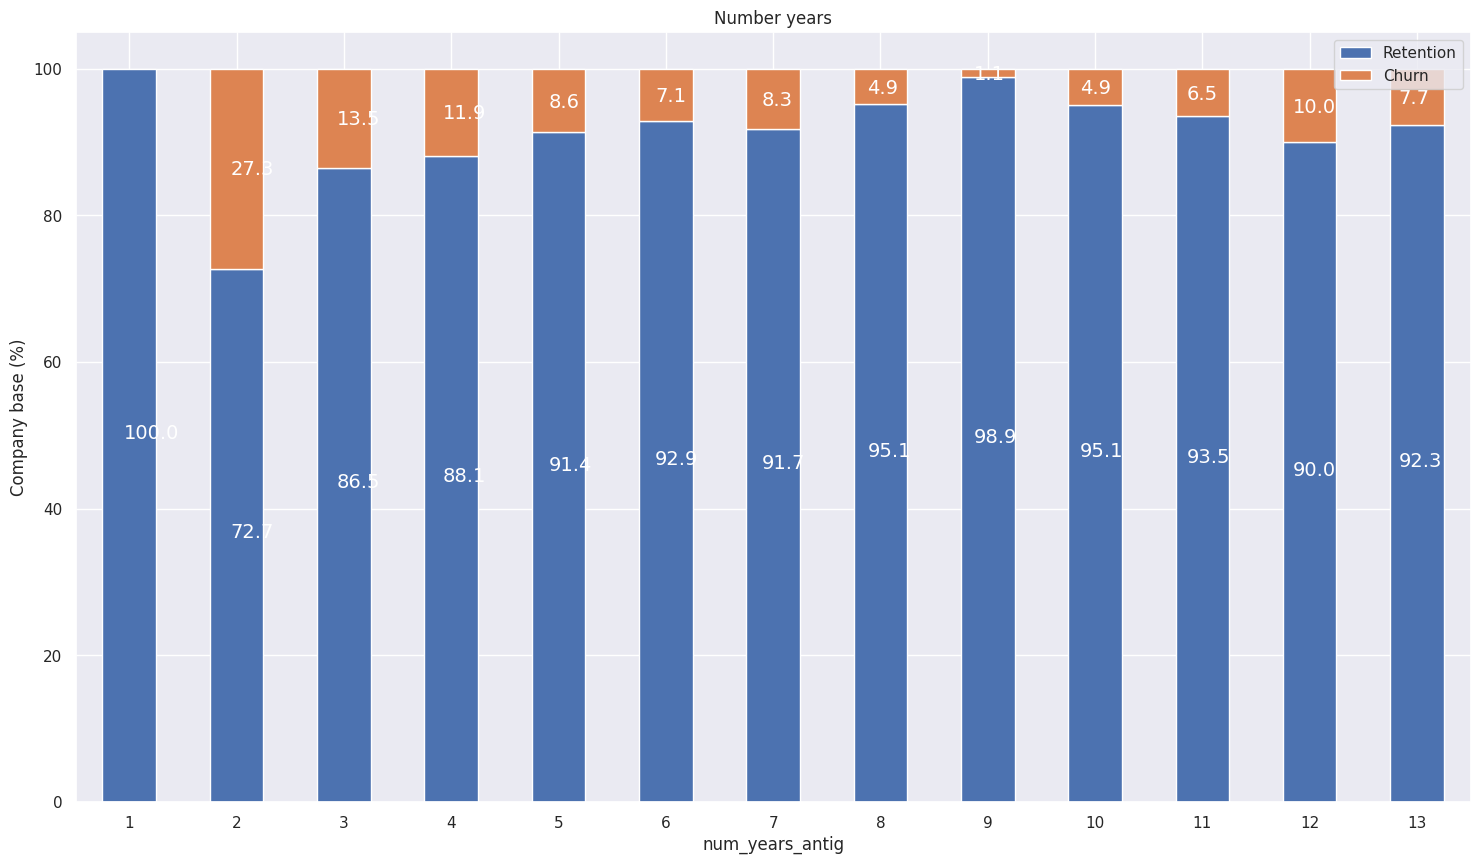

In [ ]:
# Create a stacked bar chart that show the percentage churn for years antiquity
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

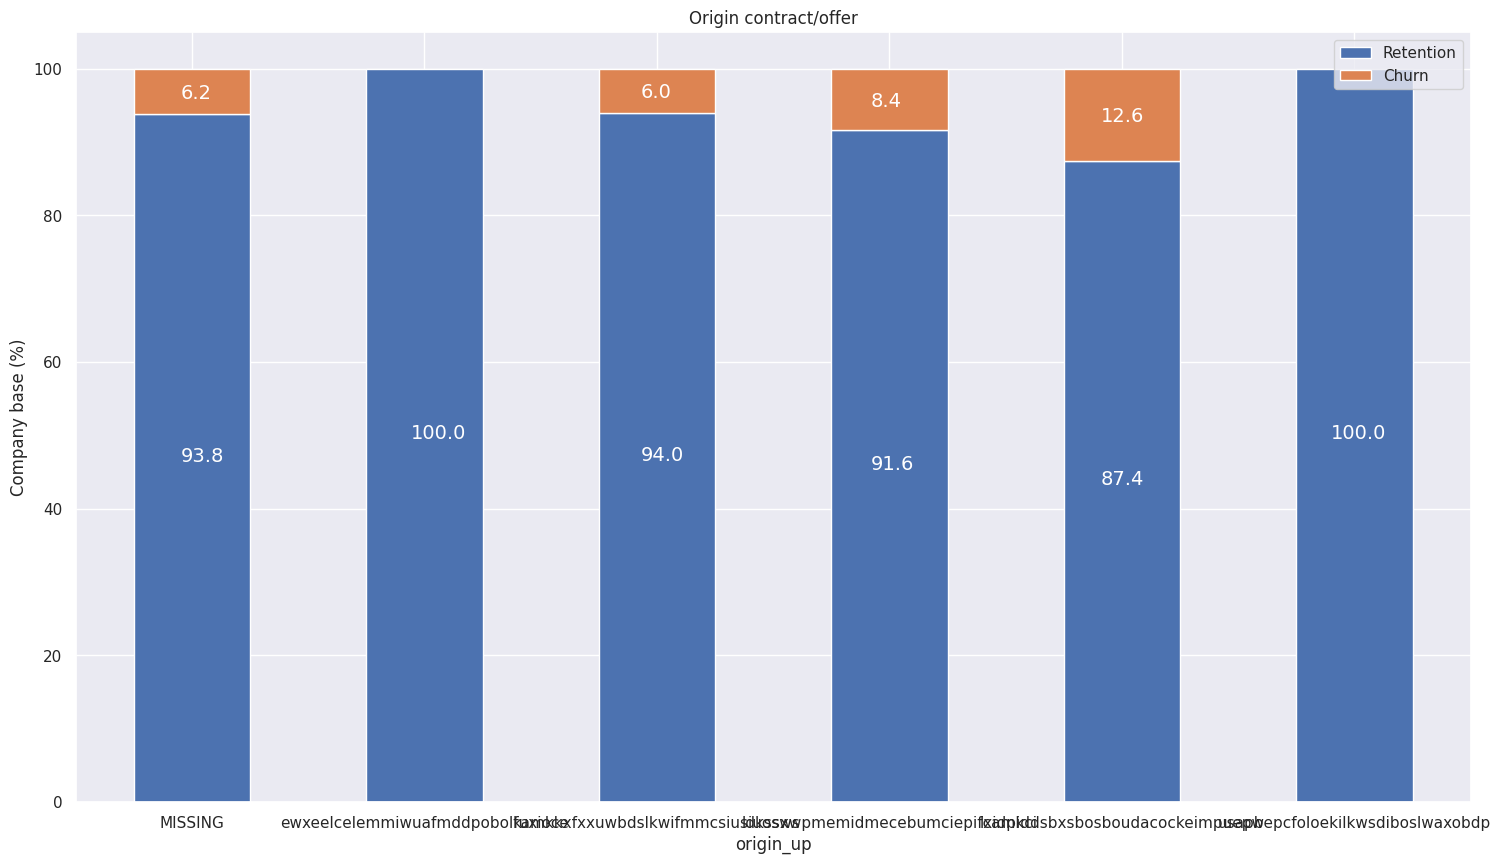

In [ ]:
# Create a stacked bar chart that show the percentage churn for origin up
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## 5. Hypothesis investigation

Now that we have explored the data, it's time to investigate whether **price sensitivity** has some influence on churn. First we need to define exactly what is price sensitivity.

* Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


We need to transform date columns to datetime type. To do so, we can use the *pd.to_datatime* function.

In [5]:
# Transform date columns to datetime type
# Transfor the columns date_activ, date_end, date_modif_prod, date_renewal and price_date to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [ ]:
# Create mean average data, group by company
mean_year = price_df.groupby(['id']).mean().reset_index() # Dataframe with the mean average data from last year
mean_6m = price_df[price_df['price_date'] >= '2015-07-01'].groupby(['id']).mean().reset_index() # Dataframe with the mean average data of the last 6 months
mean_3m = price_df[price_df['price_date'] >= '2015-10-01'].groupby(['id']).mean().reset_index() # Dataframe with the mean average data of the last 3 months

In [23]:
# Comnbine into single dataframe

# Rename columns of mean_year
mean_year = mean_year.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

# We add fixed and variables prices in a single column
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]


# Rename columns of mean_6m
mean_6m = mean_6m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

# We add fixed and variables prices in a single column
mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]


# Rename columns of mean_3m
mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)

# We add fixed and variables prices in a single column
mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_mid_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id') 
price_features = pd.merge(price_features, mean_3m, on='id')

In [30]:
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Now lets merge in the churn data and see whether price sensitivity has any correlation with churn

In [33]:
# Merge into 1 dataframe
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head(2)

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


<ipython-input-36-d29b9e8fd34d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_analysis.corr()


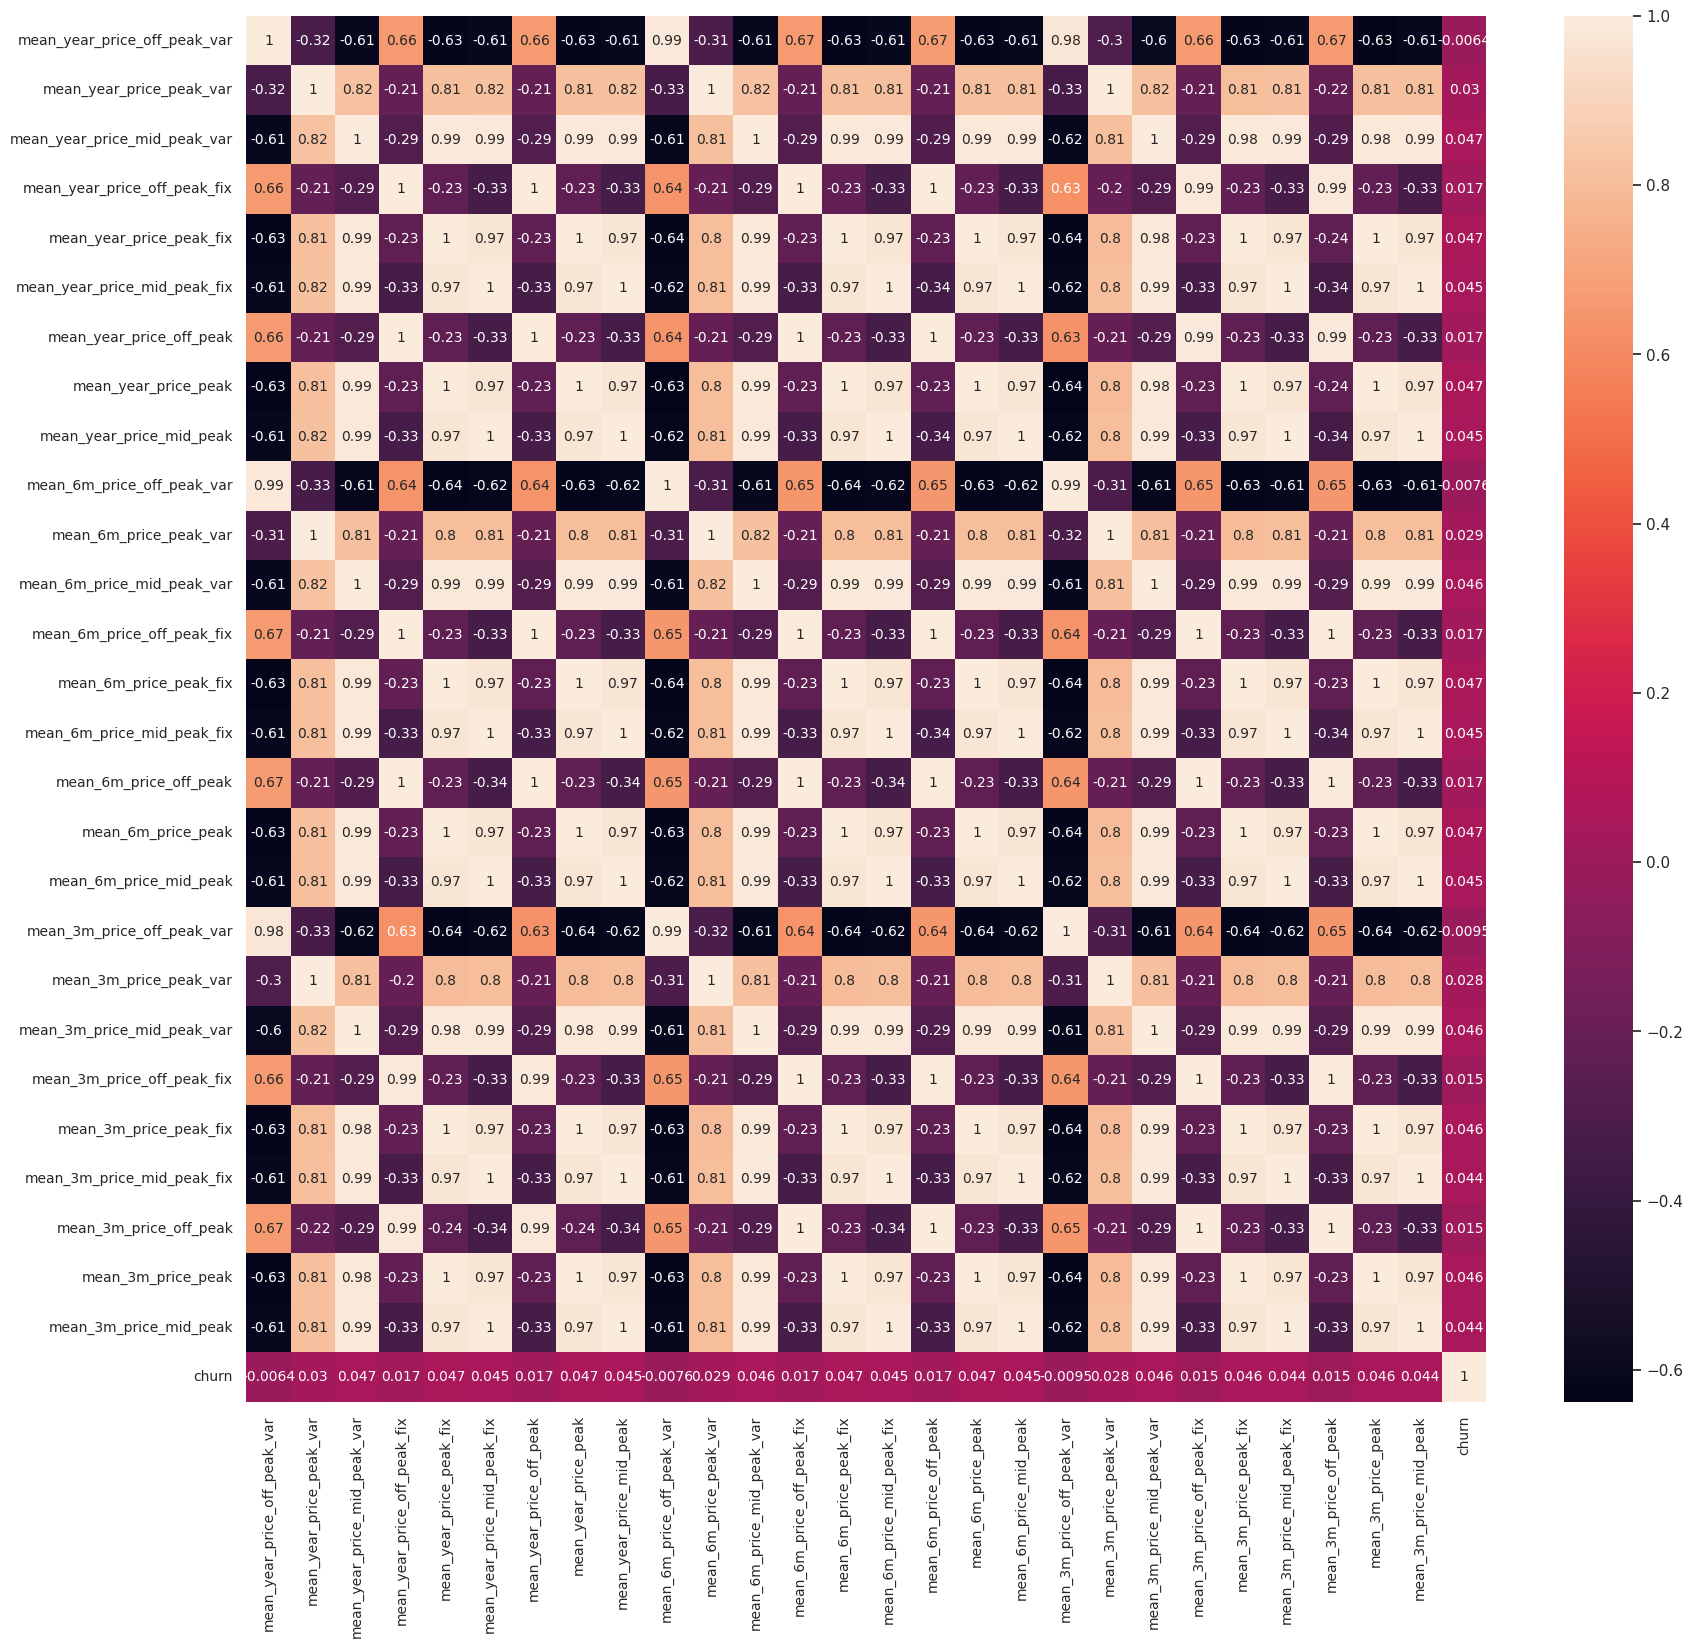

In [36]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation plot, it shows a higher magnitude of correlation between other price sensitivity variables, however overall the correlation with churn is very low. 
* This indicates that there is a weak linear relationship between price sensitity and churn. 
* This suggests that for price sensivity to be a major driver for predicting churn, we may need to engineer the feature differently.

In [38]:
# Merged the client and price analysis dataframes into a single dataframe 
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')

In [41]:
merged_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.126997,0.095024,0.049213,41.908233,16.291553,10.861037,42.035230,16.386577,10.910249,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


In [70]:
# Write the merged_data dataframe to CSV file
merged_data.to_csv('clean_data_after_eda.csv')